Simulated rainfall data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

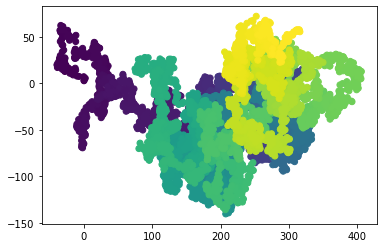

In [2]:
random_walk = np.cumsum(np.random.normal(0,3,(10000,2)),axis=0)
plt.scatter(random_walk[:,0],random_walk[:,1],c = np.arange(0,10000)/10000)

Text(0.5, 1.0, 'True delay map')

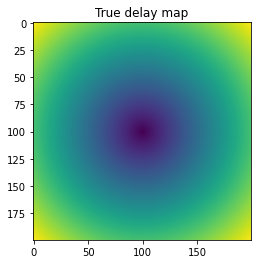

In [3]:
x_min,x_max = -100,100
y_min,y_max = -100,100
dx = x_max-x_min
dy = y_max-y_min
flow_time_image = np.zeros((dx,dy))

for i,xx in enumerate(range(-100,100)):
    for j,yy in enumerate(range(-100,100)):
        flow_time_image[i,j] = np.sqrt(xx**2 + yy**2)
        
plt.imshow(flow_time_image/np.max(flow_time_image))
plt.title('True delay map')

In [4]:
flow_time_image

array([[141.42135624, 140.7160261 , 140.01428499, ..., 139.31618714,
        140.01428499, 140.7160261 ],
       [140.7160261 , 140.00714267, 139.30183057, ..., 138.6001443 ,
        139.30183057, 140.00714267],
       [140.01428499, 139.30183057, 138.59292911, ..., 137.88763541,
        138.59292911, 139.30183057],
       ...,
       [139.31618714, 138.6001443 , 137.88763541, ..., 137.17871555,
        137.88763541, 138.6001443 ],
       [140.01428499, 139.30183057, 138.59292911, ..., 137.88763541,
        138.59292911, 139.30183057],
       [140.7160261 , 140.00714267, 139.30183057, ..., 138.6001443 ,
        139.30183057, 140.00714267]])

In [5]:
# We assume a flow meter at (0,0)
# We assume that after rain has fallen, it starts to flow at a constant rate of 1 unit distance per iteration
#     in the direction of (0,0)


In [6]:
drain_speed = 1
current_rain = []
current_rain_map = []
for index,coords in enumerate(random_walk):
    print(f'{index} length: {len(current_rain)}',end='\r')
    
    current_rain.append(coords)
    current_rain = [j - j/np.linalg.norm(j)*drain_speed for j in current_rain if np.linalg.norm(j) > drain_speed]
    current_rain_map.append(current_rain)
        

KeyboardInterrupt: 

In [7]:
max_drain_time = np.sqrt(np.sum(np.max(random_walk,axis=0) **2 )) / drain_speed
print('maximum possible steps for rain to end in drain:', max_drain_time)

maximum possible steps for rain to end in drain: 722.6011578901869


In [8]:
import pandas as pd
from matplotlib import cm
from IPython.display import HTML
import matplotlib.animation



In [20]:
import matplotlib.pyplot as plt
plt.rcParams['animation.writer'] = 'C:/FFmpeg/bin/ffmpeg.exe'

In [27]:
colormap = cm.get_cmap('viridis')

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
x, y, c = [],[],[]
sc = ax.scatter(x,y)
plt.xlim(-100,100)
plt.ylim(-100,100)

step_size = 10

def animate(i):
    i = i*step_size
    current_rain = np.array(current_rain_map[i])
    sc.set_offsets(np.c_[current_rain[:,0],current_rain[:,1]])
#     sc.set_color(colormap(np.arange(i)/(i+10)))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(current_rain_map)//step_size,
                                         interval=len(current_rain_map)//step_size/10,blit=True, repeat=True) 
ani.save('test.mp4')
plt.show()

RuntimeError: The animation function must return a sequence of Artist objects.

In [ ]:
HTML(ani.to_html5_video())


In [86]:
len(current_rain_map)//step_size

1000

In [87]:
flow = pd.Series(np.diff([len(tmp) for tmp in current_rain_map]))
flow = 1 - flow

In [215]:
smooth_flow = flow

In [216]:
smooth_flow

0       1
1       0
2       0
3       0
4       0
       ..
9994    0
9995    1
9996    1
9997    0
9998    2
Length: 9999, dtype: int32

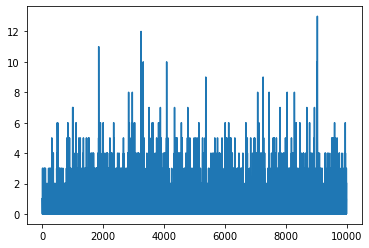

In [217]:
plt.plot(smooth_flow)

In [218]:
len(random_walk),random_walk

(10000,
 array([[  -0.81815419,   -1.16345177],
        [  -4.00135163,  -10.73791749],
        [  -4.62623669,   -9.31149822],
        ...,
        [ 511.58759373, -271.36642876],
        [ 514.1976758 , -270.6565297 ],
        [ 518.3457175 , -271.35629863]]))

In [219]:
max_steps = 1000
data_sets = []
for i in range(len(random_walk)):
    print(f'{i}',end='\r')
    data_points = []
    if i > max_steps:
        start = i - max_steps
    else:
        start = 0 
    for ii in range(start,i):
        j = random_walk[ii]
        data_points.append([j[0],j[1],i - ii])
    data_sets.append(data_points)

In [220]:
data_set[:,:2]

array([[ 333.55967358, -181.28950517],
       [ 335.04320774, -178.53338765],
       [ 343.23372717, -179.28298506],
       ...,
       [ 506.53867867, -272.01947593],
       [ 511.58759373, -271.36642876],
       [ 514.1976758 , -270.6565297 ]])

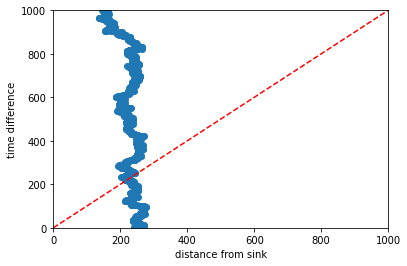

In [221]:
current_time = 2000
data_set = np.array(data_sets[current_time])
diff_distance = np.sum(np.sqrt(data_set[:,:2]**2),axis=1)
plt.scatter(diff_distance,data_set[:,-1])
plt.xlabel('distance from sink')
plt.ylabel('time difference')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.plot([0,1000],[0,1000],color='red',linestyle='--')

In [222]:
variance = 1500
y_preds = []
for data_set in data_sets[1:]:
    data_set = np.array(data_set)
    diff_distance = np.sum(np.sqrt(data_set[:,:2]**2),axis=1)
    tau = diff_distance - data_set[:,-1]
    y_pred = np.sum(np.exp(-(tau**2/variance)))
    y_preds.append(y_pred)

In [223]:
tau

array([-4.85150821e+02, -4.85423405e+02, -4.75483288e+02, -4.76385229e+02,
       -4.80590985e+02, -4.73389169e+02, -4.70261723e+02, -4.72329144e+02,
       -4.75194380e+02, -4.67283209e+02, -4.59213971e+02, -4.58327594e+02,
       -4.54511268e+02, -4.51302780e+02, -4.49062915e+02, -4.48301694e+02,
       -4.50659030e+02, -4.52776212e+02, -4.45291246e+02, -4.39594574e+02,
       -4.39926178e+02, -4.42281176e+02, -4.39199599e+02, -4.44664100e+02,
       -4.38900839e+02, -4.38007412e+02, -4.41805340e+02, -4.40337470e+02,
       -4.34892214e+02, -4.37423833e+02, -4.29279750e+02, -4.24825585e+02,
       -4.19266942e+02, -4.25206853e+02, -4.27863788e+02, -4.31630774e+02,
       -4.25549500e+02, -4.20995800e+02, -4.14104921e+02, -4.17932639e+02,
       -4.19114447e+02, -4.21598882e+02, -4.14429167e+02, -4.20371239e+02,
       -4.14358318e+02, -4.09614932e+02, -4.11167537e+02, -4.05574213e+02,
       -4.06932012e+02, -4.05507507e+02, -4.09107592e+02, -4.09311028e+02,
       -3.96482921e+02, -

(0.0, 200.0)

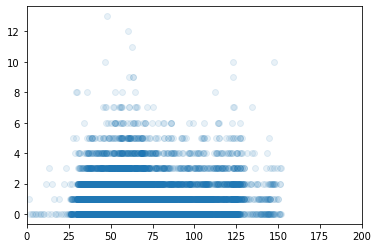

In [224]:
plt.scatter(y_preds,smooth_flow,alpha = 0.1)
plt.xlim(0,200)
# plt.ylim(0,200)

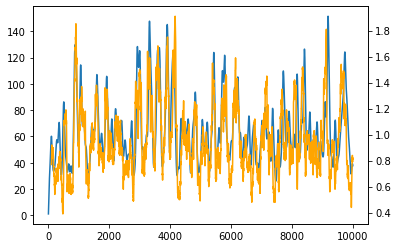

In [229]:
plt.plot(y_preds)
plt.gca().twinx().plot(smooth_flow.rolling(100,).mean(),color='orange')

In [246]:
corrcoefs = []
for i in range(1,1000):
    corrcoef = np.corrcoef(smooth_flow.ewm(i).mean().fillna(0),y_preds)[0,1]
    print(corrcoef)
    corrcoefs.append(corrcoef)

0.11075164093115399
0.12898296228160985
0.14463625581010411
0.15938265848976815
0.1737228900295456
0.18785727143625475
0.20187161369590254
0.21579598989870763
0.2296301899071633
0.24335743560496126
0.256952641601829
0.2703875670678217
0.28363399160767083
0.296665584413858
0.30945890815519006
0.3219938609333961
0.3342537653993942
0.3462252470791733
0.35789799620777285
0.3692644739010912
0.3803196005601575
0.3910604490708384
0.40148595537582904
0.4115966526701022
0.42139443158961476
0.43088232647497504
0.4400643265180307
0.44894520995519704
0.4575303992073071
0.46582583482291723
0.47383786616155443
0.48157315689512803
0.48903860357387147
0.49624126567729704
0.5031883057393013
0.5098869382943292
0.5163443865356262
0.5225678457067509
0.5285644523638199
0.5343412587494821
0.5399052116113358
0.5452631348785927
0.5504217156824049
0.5553874932684
0.5601668504056145
0.5647660069449953
0.5691910152238061
0.573447757050198
0.5775419420356132
0.5814791070720708
0.5852646167771739
0.588903664752402

0.4726223332991603
0.47225000388589833
0.4718785795386174
0.4715080575033403
0.4711384350320288
0.4707697093826183
0.4704018778190875
0.4700349376114941
0.4696688860360586
0.46930372037514617
0.46893943791738896
0.468576035957671
0.46821351179721593
0.4678518627435802
0.46749108611073653
0.4671311792190953
0.46677213939556467
0.46641396397354223
0.46605665029299037
0.46570019570044846
0.4653445975490941
0.46498985319873704
0.4646359600158851
0.4642829153737581
0.46393071665230395
0.4635793612382668
0.4632288465251638
0.46287916991335504
0.46253032881003814
0.462182320629291
0.4618351427920781
0.4614887927262905
0.46114326786676285
0.4607985656552744
0.4604546835406039
0.46011161897851394
0.45976936943177193
0.4594279323702082
0.45908730527068775
0.4587474856171387
0.4584084709005539
0.45807025861905176
0.45773284627782573
0.4573962313892134
0.45706041147265053
0.4567253840547457
0.4563911466692416
0.45605769685704506
0.45572503216623683
0.4553931501520719
0.4550620483769747
0.454731724

0.36412893398604923
0.36398281076348915
0.36383692952855134
0.363691289698875
0.36354589069405735
0.36340073193549205
0.36325581284649683
0.36311113285223623
0.36296669137972387
0.3628224878577941
0.362678521717182
0.3625347923903684
0.36239129931173225
0.3622480419174327
0.3621050196454307
0.36196223193552424
0.3618196782292736
0.3616773579700344
0.3615352706029549
0.36139341557495147
0.3612517923347057
0.3611104003326504
0.3609692390209794
0.3608283078536542
0.36068760628635405
0.3605471337764922
0.3604068897831975
0.3602668737673455
0.3601270851915077
0.3599875235199788
0.35984818821871317
0.3597090787554047
0.3595701945994056
0.35943153522175764
0.3592931000951902
0.3591548886940689
0.35901690049442453
0.35887913497397517
0.3587415916120584
0.35860426988964883
0.3584671692893706
0.35833028929547905
0.35819362939382626
0.3580571890719313
0.3579209678188495
0.35778496512531227
0.357649180483618
0.35751361338761717
0.35737826333283695
0.3572431298162793
0.35710821233660617
0.356973510

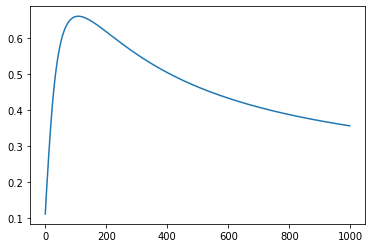

In [247]:
plt.plot(corrcoefs)

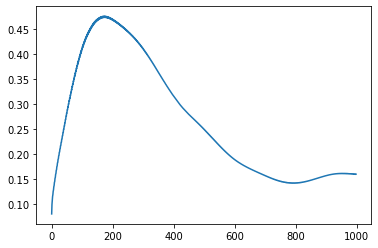

In [244]:
plt.plot(corrcoefs)

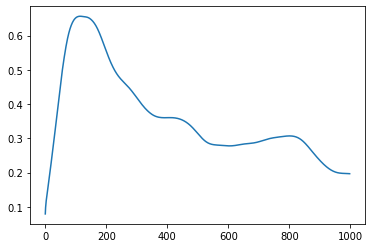

In [242]:
plt.plot(corrcoefs)